In [75]:
!pip install pingouin

  Created wheel for pingouin: filename=pingouin-0.3.8-py3-none-any.whl size=221692 sha256=158d30a617c3f6bbcab32a78fc82d0f2c442e5c2307ec27b4b67006201ef665b
  Stored in directory: c:\users\maisa\appdata\local\pip\cache\wheels\6d\60\60\30767bba9ffecc666e5feeed793b0e98ec6c8a37b714458a5e
  Created wheel for outdated: filename=outdated-0.2.0-py3-none-any.whl size=4964 sha256=8870d23c153b5b92cb29202c047b3f1337e5d5f2b5450eebef4360f822462133
  Stored in directory: c:\users\maisa\appdata\local\pip\cache\wheels\2d\4f\c9\062da6e68841f60d0c3434980775671daaa07a574110567de6
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7054 sha256=6a9589085c965987692a38683d5b2f49d9f46072f0c0d20ade55648744845710
  Stored in directory: c:\users\maisa\appdata\local\pip\cache\wheels\6a\33\c4\0ef84d7f5568c2823e3d63a6e08988852fb9e4bc822034870a
Successfully built pingouin outdated littleutils


In [105]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg

In [162]:
dataframe = pd.read_csv("DadosEstatisticos-com-colunas-de-interesse.csv",sep=";",encoding='latin-1');

In [268]:
dataframe.rename(columns={'EMPRESA (SIGLA)': 'EMPRESA_SIGLA'}, inplace = True)
dataframe.rename(columns={'AEROPORTO DE ORIGEM (NOME)': 'AERO_ORIGEM'}, inplace = True)
dataframe.rename(columns={'AEROPORTO DE DESTINO (NOME)': 'AERO_DESTINO'}, inplace = True)

In [269]:
dataframe['HORAS VOADAS'] = dataframe['HORAS VOADAS'].apply(lambda x: str(x).replace(",","."))

In [270]:
dataframe['HORAS VOADAS'] = dataframe['HORAS VOADAS'].astype('float64')

In [274]:
dataframe_TAM_MAO_BEL_2018_2019 = dataframe.loc[((dataframe.EMPRESA_SIGLA == 'TAM') &
                                           (dataframe.AERO_ORIGEM == 'MANAUS') & 
                                           (dataframe.AERO_DESTINO == 'BELÉM') & 
                                           ((dataframe.ANO == 2018) | (dataframe.ANO == 2019)))]

In [275]:
dataframe_TAM_MAO_BEL_2018_2019 = dataframe_dest_norte_2019.dropna()

In [276]:
dataframe_TAM_MAO_BEL_2018_2019 = dataframe_TAM_MAO_BEL_2018_2019.groupby(['ANO','MÊS']).sum()

**<h1>ESCOPO</h1>**

Decolagens realizadas no ano de **2018 e 2019** de **MANAUS** para **BELEM** através da companhia aérea **TAM**.

Fonte: ANAC (Agência Nacional de Aviação Civil)

In [277]:
dataframe_TAM_MAO_BEL_2018_2019

PASSAGEIROS PAGOS  PASSAGEIROS GRÁTIS  CARGA PAGA (KG)  \
ANO  MÊS                                                           
2018 1               4104.0                 4.0          49695.0   
     2               3760.0                 5.0          24835.0   
     3               4330.0                 4.0          43817.0   
     4               5282.0                 6.0          61760.0   
     5               5436.0                 2.0          59988.0   
     6               5519.0                 8.0          53759.0   
     7               5877.0                 9.0          45257.0   
     8               5619.0                 8.0          59407.0   
     9               5390.0                 6.0          48647.0   
     10              5881.0                27.0          42212.0   
     11              6353.0                19.0          44723.0   
     12              7251.0                27.0          51287.0   
2019 1               6216.0                12.0          31504.0   
     2               4829.0                16.0          53446.0   
     3               5249.0                27.0          53236.0   
     4               6093.0                18.0          54162.0   
     5               4991.0                19.0          63382.0   
     6               5749.0                21.0          55618.0   
     7               5467.0                21.0          39371.0   
     8               5215.0                 9.0          19480.0   
     9               4831.0                10.0          15809.0   
     10              5022.0                 5.0          18007.0   
     11              3499.0                 8.0          17853.0   
     12              4820.0                17.0          22580.0   

          CARGA GRÁTIS (KG)  DISTÂNCIA VOADA (KM)  DECOLAGENS  ASSENTOS  \
ANO  MÊS                                                                  
2018 1                 65.0               40269.0        31.0    6606.0   
     2                311.0               35073.0        27.0    5894.0   
     3                269.0               38970.0        30.0    6462.0   
     4               2145.0               42867.0        33.0    7214.0   
     5                973.0               45465.0        35.0    7700.0   
     6               4601.0               41568.0        32.0    6994.0   
     7               2266.0               46764.0        36.0    7920.0   
     8               2164.0               45465.0        35.0    7700.0   
     9               2545.0               42867.0        33.0    7260.0   
     10                 7.0               45465.0        35.0    7654.0   
     11               900.0               44166.0        34.0    7296.0   
     12                 1.0               45465.0        35.0    7516.0   
2019 1                  4.0               45465.0        35.0    7516.0   
     2                  1.0               41568.0        32.0    6810.0   
     3                274.0               44166.0        34.0    7250.0   
     4                185.0               45465.0        35.0    7516.0   
     5                  1.0               45465.0        35.0    7516.0   
     6                  0.0               44166.0        34.0    7250.0   
     7                906.0               45465.0        35.0    6676.0   
     8                  0.0               45465.0        35.0    6432.0   
     9                  0.0               44166.0        34.0    6360.0   
     10                11.0               45465.0        35.0    6470.0   
     11               983.0               35073.0        27.0    5016.0   
     12              1094.0               38970.0        30.0    5362.0   

          HORAS VOADAS  BAGAGEM (KG)  
ANO  MÊS                              
2018 1           64.14       41610.0  
     2           55.60       33178.0  
     3           63.10       36038.0  
     4           68.19       36330.0  
     5           72.26       39174.0  
     6           

**<h1>NORMALIDADE DOS DADOS</h1>**

Ho = Os dados apresentam distribuição

H1 = Os dados não apresentam distribuição normal

Se (p-valor) é menor que 0,05 (5%) rejeita-se a hipótese nula.

In [278]:
pg.normality(dataframe_TAM_MAO_BEL_2018_2019)

,W,pval,normal
PASSAGEIROS PAGOS,0.978428,0.865214,True
PASSAGEIROS GRÁTIS,0.904312,0.026595,False
CARGA PAGA (KG),0.893130,0.015436,False
CARGA GRÁTIS (KG),0.740834,0.000037,False
DISTÂNCIA VOADA (KM),0.797985,0.000273,False
DECOLAGENS,0.797985,0.000273,False
ASSENTOS,0.904135,0.026363,False
HORAS VOADAS,0.844369,0.001722,False
BAGAGEM (KG),0.947541,0.239517,True


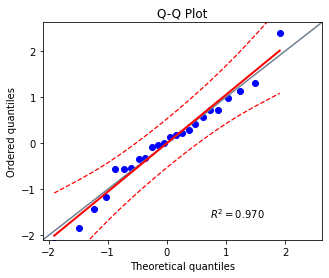

In [280]:
x = dataframe_TAM_MAO_BEL_2018_2019['PASSAGEIROS PAGOS']
ax = pg.qqplot(x, dist='norm')

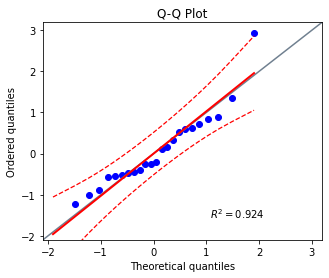

In [279]:
x = dataframe_TAM_MAO_BEL_2018_2019['BAGAGEM (KG)']
ax = pg.qqplot(x, dist='norm')

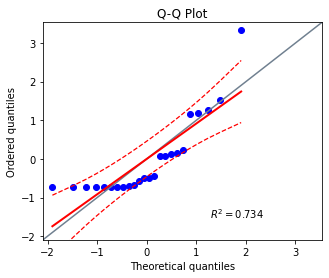

In [283]:
x = dataframe_TAM_MAO_BEL_2018_2019['CARGA GRÁTIS (KG)']
ax = pg.qqplot(x, dist='norm')

**<h1>CONCLUSÃO SOBRE A NORMALIDADE DOS DADOS</h1>**

Os campos **"PASSAGEIROS PAGOS" e "BAGAGEM (KG)"**, no escopo delimitado, apresentam **distribuição normal**.

O restante, não.

**<h1>OUTLIERS</h1>**

C:\Users\maisa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PASSAGEIROS PAGOS'>

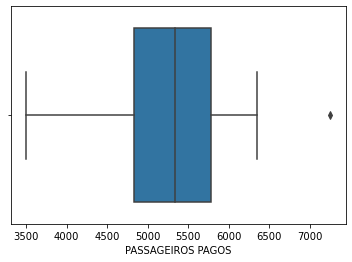

In [295]:
sns.boxplot(dataframe_TAM_MAO_BEL_2018_2019['PASSAGEIROS PAGOS'])

C:\Users\maisa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BAGAGEM (KG)'>

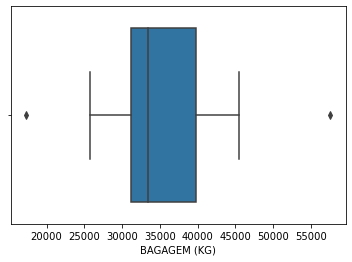

In [296]:
sns.boxplot(dataframe_TAM_MAO_BEL_2018_2019['BAGAGEM (KG)'])

C:\Users\maisa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CARGA GRÁTIS (KG)'>

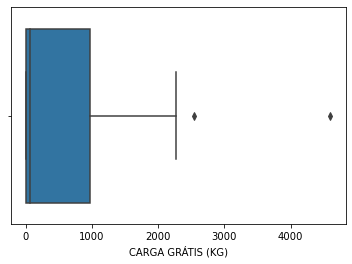

In [297]:
sns.boxplot(dataframe_dest_norte_2019['CARGA GRÁTIS (KG)'])

**<h1>CONCLUSÃO SOBRE OUTLIERS</h1>**

Há outliers nos dados.

Como podemos perceber pelos boxes-plots, os campos **"PASSAGEIROS PAGOS", "BAGAGEM (KG)" e "CARGA GRÁTIS (KG)"** apresentam **outliers.**